In [5]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [127]:
import tensorflow as tf
import numpy as np
import input_data

mnist_width = 28
n_visible = mnist_width * mnist_width
n_hidden = 10
nBatch = None

''' Data '''
mnist = input_data.read_data_sets("/mnt/hdd1/thkim/dataset/MNIST", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels


''' create node for input data '''
X = tf.placeholder("float32", [nBatch, n_visible], name='X')
H = tf.placeholder("float32", [nBatch, n_hidden], name='H')

''' create nodes for hidden variables '''
#C_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
#C_init = tf.random_uniform(shape=[n_visible, n_hidden],
#                           minval=-C_max,
#                           maxval=C_max)

C_init = tf.convert_to_tensor(trX[np.random.randint(0,len(trX),n_hidden)].T)

C = tf.Variable(C_init, name='C')

C2 = tf.expand_dims(tf.transpose(C),0)
X2 = tf.expand_dims(X,1)
print C2.get_shape()
print X2.get_shape()

dist = tf.reduce_sum(tf.square(tf.sub(X2,C2)),2)
cost = tf.reduce_mean(tf.reduce_min(dist,1))
choice = tf.argmin(dist,1)

train_op = tf.train.GradientDescentOptimizer(1.).minimize(cost)  # construct an optimizer
#train_op = tf.train.AdadeltaOptimizer(1e-3).minimize(cost)
#train_op = tf.train.AdamOptimizer().minimize(cost)

''' Launch the graph in a session '''
sess = tf.Session()

C_acc = np.zeros((100,784,10))

nInputBatch = 128
tf.initialize_all_variables().run(session=sess)
print('-1', sess.run(cost, feed_dict={X: teX[:nInputBatch]}))
C_acc[0] = sess.run(C)

for i in range(100):
    cnt = 0
    for start, end in zip(range(0, len(trX), nInputBatch), range(nInputBatch, len(trX), nInputBatch)):
        cnt += 1
        input_ = trX[start:end]
        _,trainCost = sess.run([train_op,cost], feed_dict={X: input_})
        #if cnt % 100 == 0: print "Iter", cnt, trainCost/nInputBatch
        if cnt<len(C_acc): C_acc[cnt] = sess.run(C)
    
    out =  sess.run([cost,dist,choice], feed_dict={X: teX})
    print 'Test iter %d %5.3f'%(i, out[0])
    #print out[2]


('Extracting', '/mnt/hdd1/thkim/dataset/MNIST/train-images-idx3-ubyte.gz')
('Extracting', '/mnt/hdd1/thkim/dataset/MNIST/train-labels-idx1-ubyte.gz')
('Extracting', '/mnt/hdd1/thkim/dataset/MNIST/t10k-images-idx3-ubyte.gz')
('Extracting', '/mnt/hdd1/thkim/dataset/MNIST/t10k-labels-idx1-ubyte.gz')
(1, 10, 784)
(?, 1, 784)
('-1', 65.372101)
Test iter 0 40.976
Test iter 1 40.813
Test iter 2 40.724
Test iter 3 40.724
Test iter 4 40.724
Test iter 5 40.724
Test iter 6 40.724
Test iter 7 40.724
Test iter 8 40.724
Test iter 9 40.724
Test iter 10 40.724
Test iter 11 40.724
Test iter 12 40.724
Test iter 13 40.724
Test iter 14 40.724
Test iter 15 40.724
Test iter 16 40.724
Test iter 17 40.724
Test iter 18 40.724
Test iter 19 40.724
Test iter 20 40.724
Test iter 21 40.724
Test iter 22 40.724
Test iter 23 40.724
Test iter 24 40.724
Test iter 25 40.724
Test iter 26 40.724
Test iter 27 40.724
Test iter 28 40.724
Test iter 29 40.724
Test iter 30 40.724
Test iter 31 40.724
Test iter 32 40.724
Test iter

<IPython.core.display.Javascript object>


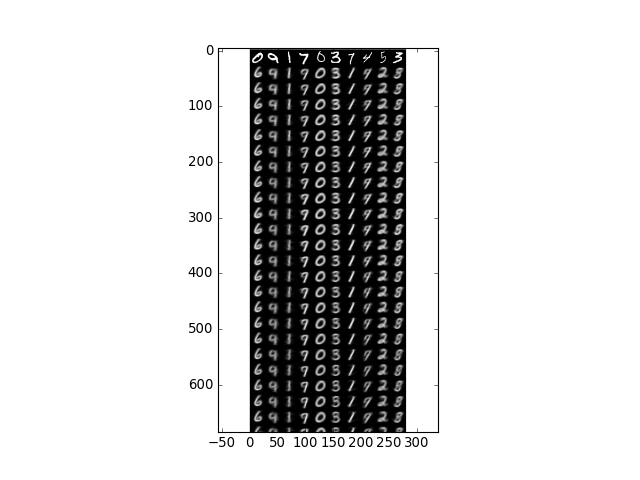

In [136]:
t=C_acc
t=t.reshape(100,28,28,10) 

t2 = np.zeros((2800,280))
for i in range(100):
    for j in range(10):
        t2[i*28:(i+1)*28,j*28:(j+1)*28] = t[i,:,:,j]
plt.figure()
plt.imshow(t2[:,:],cmap = plt.get_cmap('gray'))
plt.show()

In [133]:
from sklearn.cluster import KMeans

Kcents = 10
km = KMeans(init='random',n_clusters=Kcents, n_init=5, n_jobs=8)
#km = KMeans(init='k-means++',n_clusters=Kcents, n_init=5, n_jobs=8)
km.fit(trX)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=10, n_init=5,
    n_jobs=8, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

<IPython.core.display.Javascript object>


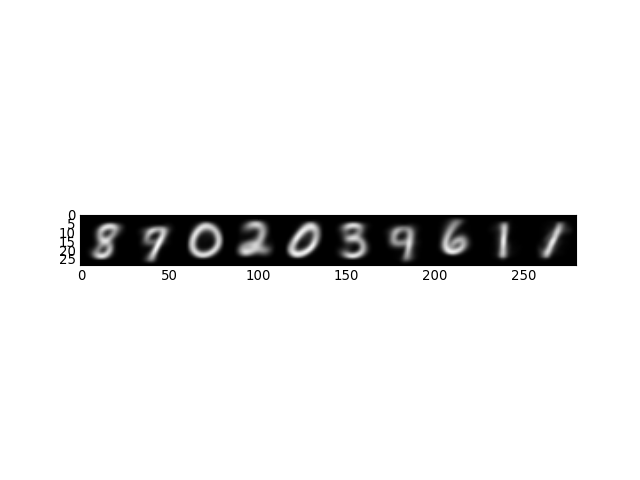

In [134]:
km.cluster_centers_.shape
plotcent(km.cluster_centers_.reshape((10,28,28)))

In [126]:
def plotcent(cent):
    '''
        cent.shape should be (nCent, nDim)
    '''
    def con(a,b):
        return np.concatenate((a,b),axis=1)
    #cent = np.swapaxes(cent,0,2)
    #cent = np.swapaxes(cent,1,2)
    cent2=reduce(con,cent)
    plt.figure()
    plt.imshow(cent2,cmap = plt.get_cmap('gray'))
    plt.show()
    
def genData():
    nData = 1000

    m1 = [3,3]
    s1 = [[0.5,0],[0,0.5]]
    m2 = [0,0]
    s2 = [[0.2,0.1],[0.1,0.2]]
    m3 = [-3,3]
    s3 = [[0.1,0.1],[0.1,0.2]]

    X = np.concatenate(
        (np.random.multivariate_normal(m1,s1,nData),
        np.random.multivariate_normal(m2,s2,nData),
        np.random.multivariate_normal(m3,s3,nData)),
        axis=0)
    Y = np.concatenate(
        (np.zeros(nData),
        np.ones(nData),
        np.ones(nData)*2))

    return X, Y